# Proceso de Limpieza de Datos en Assessment_archivo_fuente

## Descripción del Proceso
### Entendimiento de los datos **¿Qué es una fila de la fuente compartida?**
- Archivo de datos: Assessment_archivo_fuente.csv
- Estructura: MOVIES, YEAR, GENRE, RATING, ONE-LINE, STARS, VOTES, RunTime, Gross
- Hipótesis: Cada fila representa una critica recibida a una serie de TV, Película o programa transmitido en los últimos años.

## Principales Retos

1. Codificación de caracteres: Se encontraron caracteres no mapeados en el conjunto de caracteres por defecto.
   - Solución: Se utilizó la codificación UTF-8 al abrir el archivo para evitar el error `UnicodeDecodeError`.

2. Formato inconsistente de los campos:
   - Año: Algunos años contenían caracteres adicionales como `"â€“"` que debían ser eliminados.
   - Género: Los géneros estaban separados por comas y contenían espacios adicionales.
   - Calificación: Se encontraron calificaciones encerradas en paréntesis y con espacios adicionales.

## Herramientas y Técnicas Utilizadas

- Python: Se utilizó el lenguaje de programación Python para el procesamiento de datos.
- Jupyter Notebook: Se creó un Jupyter Notebook para el desarrollo y presentación del proceso de limpieza.
- Funciones de cadena y manipulación de listas: Se emplearon diversas funciones para limpiar y transformar los datos.


In [1]:
#with open('Assessment_archivo_fuente.csv' , 'r', encoding='utf-8') as archivo:
#    datos = archivo.readlines()
   
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('Assessment_archivo_fuente.csv', encoding='utf-8')

rows = len(df.axes[0]) 
cols = len(df.axes[1])   

print('\033[1m' +"Las dimensiones de los datos trabajados son:"+'\033[0m')
print("Number of Rows: " + str(rows)) 
print("Number of Columns: " + str(cols)) 
print(" ")
print('\033[1m' +"Las columnas y tipos de los datos:"+'\033[0m')
print(df.dtypes)
# Identificar la cantidad de datos faltantes en cada columna
datos_faltantes = df.isna().sum()

# Calcular el porcentaje de datos faltantes en cada columna
total_datos = df.shape[0]
porcentaje_faltantes = (datos_faltantes / total_datos) * 100

# Crear un nuevo DataFrame con los resultados
resultados = pd.DataFrame({'Datos faltantes': datos_faltantes, '% Faltante': porcentaje_faltantes})

# Mostrar los resultados
print(" ")
print('\033[1m' +"Datos faltantes por columna:"+'\033[0m')
print(resultados)


Las dimensiones de los datos trabajados son:
Number of Rows: 9999
Number of Columns: 9
 
Las columnas y tipos de los datos:
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object
 
Datos faltantes por columna:
          Datos faltantes  % Faltante
MOVIES                  0    0.000000
YEAR                  644    6.440644
GENRE                  80    0.800080
RATING               1820   18.201820
ONE-LINE                0    0.000000
STARS                   0    0.000000
VOTES                1820   18.201820
RunTime              2958   29.582958
Gross                9539   95.399540


## Análisis de calidad de datos
La calidad de los datos consiste en validar la idoneidad de los datos analizando varias dimensiones, entre las cuales resaltamos:
- Completitud: Datos que no existen o no se conocen
- Unicidad (Duplicidad): Datos que son idénticos en diferentes registros o registros con valores idénticos en atributos en los que no debería ocurrir
- Consistencia: Esta medida se define por la validez o integridad del dato, en la definición de su estructura, al interior de una fila o entre diferentes filas de la misma fuente o de diferentes fuentes. El manejo de unidades en los datos y el significado del dato son generadores de inconsistencias.
- Validez: a nivel de formato y de sentido de los datos más alla de sus valores

Para asegurar una calidad mínima de los datos en estas dimensiones hay que entender su origen y posteriormente realizar un proceso de validación de cada una de las dimensiones de perfilamiento que llevará a un entendimiento de los datos disponibles.

In [2]:
# Identificar los datos duplicados
duplicados = df[df.duplicated()]

# Contar la cantidad de datos duplicados y cuántas veces se repiten
cantidad_duplicados = duplicados.shape[0]
repeticiones = duplicados.duplicated().value_counts()

# Mostrar los resultados
print("Cantidad de datos duplicados:", cantidad_duplicados)
print("Repeticiones:")
print(repeticiones)

# Mostrar los datos duplicados
print("Datos duplicados:")
duplicados.head(30)

Cantidad de datos duplicados: 431
Repeticiones:
True     314
False    117
dtype: int64
Datos duplicados:


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6839,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6840,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6841,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6842,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6843,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN


In [3]:
# Encontrar registros duplicados por "MOVIES"
duplicados = df.duplicated(subset='MOVIES').sum()

# Mostrar los resultados
print("Cantidad de registros duplicados por MOVIES:", duplicados)

Cantidad de registros duplicados por MOVIES: 3182


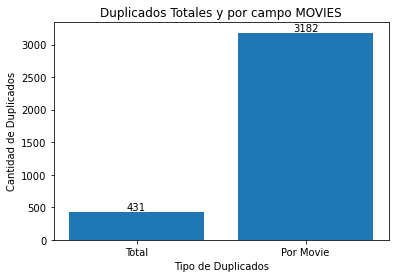

In [4]:
# Obtener la cantidad total de datos duplicados
total_duplicados = df.duplicated().sum()

# Obtener la cantidad de datos duplicados por película
duplicados_por_movie = df.duplicated(subset='MOVIES').sum()

# Crear el gráfico
fig, ax = plt.subplots()
ax.bar(['Total', 'Por Movie'], [total_duplicados, duplicados_por_movie])
ax.set_xlabel('Tipo de Duplicados')
ax.set_ylabel('Cantidad de Duplicados')
ax.set_title('Duplicados Totales y por campo MOVIES')

# Agregar etiquetas a las columnas
for i, v in enumerate([total_duplicados, duplicados_por_movie]):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()
plt.show()

In [5]:
# Filtrar el DataFrame por el valor de la columna "MOVIES"
nombre_pelicula = 'Mighty Little Bheem'

# Filtrar el DataFrame por el nombre de la película

# Filtrar el DataFrame por el valor de la columna "MOVIES"
df_filtrado = df[df['MOVIES'].str.contains(nombre_pelicula)]
#df_filtrado = df.loc[df['MOVIES'] == nombre_pelicula]
df_filtrado

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
5161,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",6.7,\nAn innocent toddler's boundless curiosity - ...,\n,214,6.0,NaN
5697,Mighty Little Bheem: Kite Festival,(2021– ),"\nAnimation, Comedy, Family",8.5,\nAdd a Plot\n,"\n \n Stars:\nAranya Kaur, \nNis...",12,NaN,NaN
5704,Mighty Little Bheem: Festival of Colors,(2020– ),\nAnimation,6.9,\nFrom surprising stage performances to sprayi...,\n,34,NaN,NaN
5710,Mighty Little Bheem: Diwali,(2019– ),\nAnimation,7.5,\nFrom decorating his home to devouring sweets...,\n,34,NaN,NaN
6681,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.1,\nAn innocent toddler's boundless curiosity - ...,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",9,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9042,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9043,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9044,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9045,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN


In [6]:
# Obtener la cantidad de datos no nulos en cada fila
completitud = df.count(axis=1)

# Agregar la columna "Completitud" al DataFrame
df['Completitud'] = completitud

# Mostrar el DataFrame con la nueva columna
print("DataFrame con la columna 'Completitud':")
df.head(10)

DataFrame con la columna 'Completitud':


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Completitud
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,8
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,8
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,8
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,8
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,5
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,8
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN,8
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN,8
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN,8
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN,8


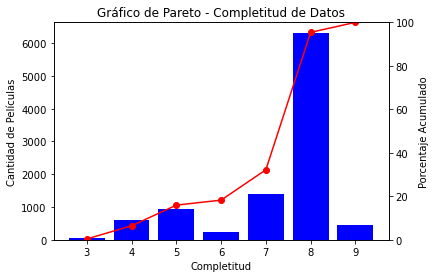

In [7]:
# Obtener la cantidad de películas con cada nivel de completitud
completitud_counts = df['Completitud'].value_counts().sort_index()

# Calcular el porcentaje acumulado
porcentaje_acumulado = (completitud_counts.cumsum() / completitud_counts.sum()) * 100

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots()

ax1.bar(completitud_counts.index, completitud_counts, color='b')
ax1.set_xlabel('Completitud')
ax1.set_ylabel('Cantidad de Películas')
ax1.set_xticks(completitud_counts.index)

ax2 = ax1.twinx()
ax2.plot(completitud_counts.index, porcentaje_acumulado, 'r-', marker='o')
ax2.set_ylim([0, 100])
ax2.set_ylabel('Porcentaje Acumulado')

plt.title('Gráfico de Pareto - Completitud de Datos')

plt.show()

In [8]:
# Filtrar el DataFrame por el valor de la columna "MOVIES"
nombre_pelicula = '¿Quién Mató a Sara?'

# Filtrar el DataFrame por el nombre de la película

# Filtrar el DataFrame por el valor de la columna "MOVIES"
df_filtrado2 = df[df['MOVIES'].str.contains(nombre_pelicula)]
#df_filtrado = df.loc[df['MOVIES'] == nombre_pelicula]
df_filtrado2

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Completitud
448,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",6.4,\nHell-bent on exacting revenge and proving he...,"\n \n Stars:\nManolo Cardona, \n...","10,387",NaN,NaN,7
9132,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",8.1,\nAnother suspect in Sara's death comes into p...,\n Director:\nBernardo De la Rosa Villarrea...,248,37.0,NaN,8
9601,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",7.0,\nAlex makes his first move on the Lazcano fam...,\n Director:\nDavid Ruiz\n| \n Stars:\nM...,356,39.0,NaN,8
9773,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",7.3,\nCesar refuses to tell Elisa what happened to...,\n Director:\nDavid Ruiz\n| \n Stars:\nM...,279,40.0,NaN,8
9774,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",7.4,\nMariana receives a chilling reminder of the ...,\n Director:\nDavid Ruiz\n| \n Stars:\nM...,256,39.0,NaN,8
9775,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",7.4,\nRodolfo pays a visit to Alex and learns a sh...,\n Director:\nDavid Ruiz\n| \n Stars:\nM...,241,41.0,NaN,8
9776,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",7.3,\nThe burden of having to keep all the Lazcano...,\n Director:\nBernardo De la Rosa Villarrea...,242,40.0,NaN,8
9777,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",7.5,\nAfter Cesar's darker side is brutally expose...,\n Director:\nBernardo De la Rosa Villarrea...,228,35.0,NaN,8
9778,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",7.3,\nAlex and the Lazcano siblings go to the fami...,\n Director:\nBernardo De la Rosa Villarrea...,221,38.0,NaN,8
9779,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",7.5,\nAlex and Rodolfo delve into the past to disc...,"\n Directors:\nDavid Ruiz, \nBernardo De la...",213,40.0,NaN,8


In [9]:
df.shape

(9999, 10)

In [10]:
# Función de concatenación de los valores en la columna "STARS"
def concatenar_stars(valores):
    return ', '.join(valores.unique())

# Aplicar las funciones de agregación en las columnas deseadas y la concatenación en "STARS"
df_limpio = df.groupby('MOVIES').agg({
    'YEAR': 'first',
    'GENRE': 'first',
    'RATING': 'mean',
    'ONE-LINE': 'first',
    'STARS': concatenar_stars
}).reset_index()

df_limpio.shape

(6817, 6)

In [11]:
# Eliminar filas duplicadas y mantener la más completa
df_unico = df.drop_duplicates(keep='last')
df_unico.shape
# Eliminar filas con valores faltantes
#df_limpiado = df_unico.dropna()

# Mostrar el DataFrame limpiado
#print("DataFrame limpiado:")

(9568, 10)

In [12]:
# Filtrar el DataFrame por el valor de la columna "MOVIES"
nombre_pelicula = '¿Quién Mató a Sara?'

# Filtrar el DataFrame por el nombre de la película

# Filtrar el DataFrame por el valor de la columna "MOVIES"
df_filtrado2 = df_limpio[df_limpio['MOVIES'].str.contains(nombre_pelicula)]
#df_filtrado = df.loc[df['MOVIES'] == nombre_pelicula]
df_filtrado2

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS
408,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",7.381818,\nAnother suspect in Sara's death comes into p...,\n Director:\nBernardo De la Rosa Villarrea...
6802,¿Quién Mató a Sara?,(2021– ),"\nCrime, Drama, Mystery",6.400000,\nHell-bent on exacting revenge and proving he...,"\n \n Stars:\nManolo Cardona, \n..."


In [13]:
nombre_pelicula = 'quienmatoasara'
from unidecode import unidecode

# Definir la función de limpieza de texto
def limpiar_texto(texto):
    # Eliminar espacios en blanco
    texto = texto.strip()
    
    # Quitar tildes y caracteres especiales
    texto = unidecode(texto)
    
    # Eliminar caracteres de pregunta, exclamación y numeral
    texto = re.sub(r'[?!#]+', '', texto)
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Eliminar espacios en blanco nuevamente
    texto = re.sub(r'\s+', '', texto)
    
    return texto

# Aplicar la función a la columna "MOVIES"
df_limpio2=df_limpio
df_limpio2['MOVIES2'] = df_limpio['MOVIES'].apply(limpiar_texto)
print(df_limpio2.shape)
# Aplicar las funciones de agregación en las columnas deseadas y la concatenación en "STARS"
df_limpio2 = df_limpio2.groupby('MOVIES2').agg({
    'YEAR': 'first',
    'GENRE': 'first',
    'RATING': 'mean',
    'ONE-LINE': 'first',
    'STARS': concatenar_stars
}).reset_index()

print(df_limpio2.shape)

# Mostrar el DataFrame con la columna "MOVIES" limpiada
# Filtrar el DataFrame por el valor de la columna "MOVIES"
df_filtrado3 = df_limpio2[df_limpio2['MOVIES2'].str.contains(nombre_pelicula)]
#df_filtrado = df.loc[df['MOVIES'] == nombre_pelicula]
df_filtrado3

(6817, 7)
(6421, 6)


,MOVIES2,YEAR,GENRE,RATING,ONE-LINE,STARS
4117,quienmatoasara,(2021– ),"\nCrime, Drama, Mystery",6.890909,\nAnother suspect in Sara's death comes into p...,\n Director:\nBernardo De la Rosa Villarrea...


In [14]:
nombre_pelicula

'quienmatoasara'

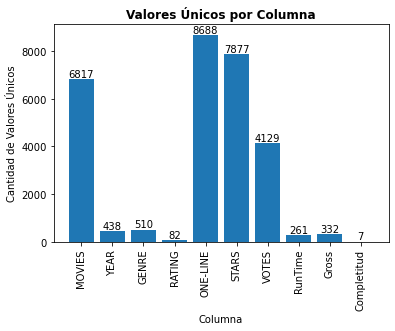

In [15]:
# Obtener la cantidad de valores únicos por columna
valores_unicos = df.nunique()

# Crear el gráfico
fig, ax = plt.subplots()
ax.bar(valores_unicos.index, valores_unicos)
ax.set_xlabel('Columna')
ax.set_ylabel('Cantidad de Valores Únicos')
ax.set_title('Valores Únicos por Columna', fontweight='bold')

# Agregar etiquetas a las columnas
for i, v in enumerate(valores_unicos):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)


# Mostrar el gráfico
plt.show()

# Columna Gross

In [16]:
unique_values0 = df['Gross'].unique()
unique_values0

array([nan, '$75.47M', '$402.45M', '$89.22M', '$315.54M', '$57.01M',
       '$260.00M', '$132.38M', '$167.77M', '$404.52M', '$15.07M',
       '$70.10M', '$210.61M', '$327.48M', '$390.53M', '$303.00M',
       '$56.63M', '$58.06M', '$353.01M', '$46.89M', '$7.00M', '$377.85M',
       '$107.83M', '$403.71M', '$316.83M', '$100.55M', '$28.26M',
       '$188.76M', '$213.52M', '$226.01M', '$408.08M', '$10.06M',
       '$14.84M', '$168.05M', '$183.64M', '$342.55M', '$96.52M',
       '$140.22M', '$172.56M', '$56.95M', '$330.36M', '$17.80M', '$0.20M',
       '$56.82M', '$66.21M', '$75.61M', '$4.56M', '$106.58M', '$5.02M',
       '$22.68M', '$102.92M', '$110.52M', '$504.01M', '$26.86M', '$2.00M',
       '$32.73M', '$33.80M', '$400.74M', '$19.02M', '$36.26M', '$6.67M',
       '$45.51M', '$75.66M', '$0.33M', '$4.00M', '$20.16M', '$95.86M',
       '$176.48M', '$126.66M', '$80.10M', '$42.34M', '$0.04M', '$4.71M',
       '$117.72M', '$229.09M', '$33.70M', '$97.69M', '$21.15M', '$27.85M',
       '$25.02

In [17]:
# Función para convertir el valor de Gross a numérico
def convertir_gross(valor):
    if isinstance(valor, str):
        # Eliminar caracteres no numéricos
        valor_limpio = re.sub(r'[^\d.]', '', valor)
        # Convertir a float
        return float(valor_limpio)
    return valor

# Aplicar la función convertir_gross a la columna Gross
df_unico['Gross'] = df_unico['Gross'].apply(convertir_gross)

# Mostrar el DataFrame limpiado
print("DataFrame limpiado:")
rows2 = len(df_unico.axes[0]) 
cols2 = len(df_unico.axes[1])  

print('\033[1m' +"Las dimensiones de los datos limpios son:"+'\033[0m')
print("Number of Rows: " + str(rows2)) 
print("Number of Columns: " + str(cols2)) 
print(" ")

DataFrame limpiado:
Las dimensiones de los datos limpios son:
Number of Rows: 9568
Number of Columns: 10
 


C:\Users\camab\AppData\Local\Temp/ipykernel_21876/1046887549.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico['Gross'] = df_unico['Gross'].apply(convertir_gross)


In [18]:
df_unico.head()


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Completitud
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,8
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,8
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,8
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,8
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,5


In [19]:
# Calcular la suma de la columna "Gross"
suma_gross = df_unico['Gross'].sum()

# Mostrar la suma de la columna "Gross"
print("Suma de la columna Gross:", suma_gross)

Suma de la columna Gross: 20102.86


## Columna Year

In [20]:
# Explorar la columna 'year'
unique_values = df['YEAR'].unique()
special_characters = []

# Verificar posibles caracteres especiales
for value in unique_values:
    if isinstance(value, str) and not value.isnumeric():
        special_characters.append(value)

# Imprimir los valores únicos y posibles caracteres especiales
print("Valores únicos:")
print(unique_values)
print("\nPosibles caracteres especiales:")
print(special_characters)

Valores únicos:
['(2021)' '(2021– )' '(2010–2022)' '(2013– )' '(2020– )' '(2006–2013)'
 '(2019– )' '(2016–2021)' '(2011– )' '(2005– )' '(2008–2013)' '(2017– )'
 '(2017–2021)' '(2016– )' '(1994–2004)' '(2014– )' '(2013–2020)'
 '(2015– )' '(2005–2020)' '(2013–2022)' '(2003– )' '(2009–2020)'
 '(I) (2018– )' '(2010–2015)' '(2011–2019)' '(2015–2020)' '(2005–2014)'
 '(2009–2015)' '(2008–2014)' '(2016–2018)' '(2009–2017)' '(2020)'
 '(2018–2021)' '(2017–2020)' '(1987–1994)' '(2018– )' '(2012– )'
 '(2014–2020)' '(2011–2018)' '(2005–2017)' '(2017)' '(2007–2015)'
 '(2000–2007)' '(II) (2007– )' '(1993)' '(1999–2022)' '(2015–2018)'
 '(2014–2019)' '(2016)' '(2012–2020)' '(2013–2019)' '(2007–2012)'
 '(2011–2020)' '(2010–2017)' '(2000–2015)' '(2015–2021)' '(2001)'
 '(1997– )' '(2011–2017)' '(1993–1999)' '(1989–1998)' '(2010–2013)'
 '(2010–2020)' '(2003–2019)' '(I) (2019)' '(2017–2019)' '(1975)'
 '(2005–2008)' '(1995–2001)' '(2006)' '(2015–2017)' '(2008–2020)'
 '(1984–1996)' '(2010– )' '(2014)' '(2000)

In [21]:
# Función para limpiar los valores de la columna 'YEAR'
import datetime

# Convertir la columna 'YEAR' a cadenas de texto
df['YEAR'] = df['YEAR'].astype(str)

current_year = datetime.datetime.now().year

# Función para limpiar los valores de la columna 'YEAR'
def quitar_no_numeros(cadena):
    nueva_cadena = ''
    for caracter in cadena:
        if caracter.isdigit() or caracter == '–':
            nueva_cadena += caracter
    return nueva_cadena

# Función para obtener el año final
def obtener_anio_fin(year2):
    if re.fullmatch(r'\d{4}', year2):
        return year2
    elif re.fullmatch(r'\d{4}–', year2):
        return str(datetime.datetime.now().year)
    elif re.fullmatch(r'\d{4}–\d{4}', year2):
        anios = re.findall(r'\d{4}', year2)
        return anios[1]
    else:
        return None

# Aplicar la limpieza a la columna 'YEAR' y crear la columna 'YEAR2'
df['YEAR2'] = df['YEAR'].apply(quitar_no_numeros)

# Crear las columnas 'Año Inicio', 'Año Fin' y 'Edad'
df['Año Inicio'] = df['YEAR2'].apply(lambda x: x.split('–')[0] if '–' in x else x)
df['Año Fin'] = df['YEAR2'].apply(obtener_anio_fin)
df['Año Inicio'] = pd.to_numeric(df['Año Inicio'], errors='coerce')
df['Año Fin'] = pd.to_numeric(df['Año Fin'], errors='coerce')
df['Edad'] = df['Año Fin'] - df['Año Inicio']
# Mostrar los resultados
print(df[['YEAR2', 'Año Inicio', 'Año Fin', 'Edad']])

          YEAR2  Año Inicio  Año Fin  Edad
0          2021      2021.0   2021.0   0.0
1         2021–      2021.0   2023.0   2.0
2     2010–2022      2010.0   2022.0  12.0
3         2013–      2013.0   2023.0  10.0
4          2021      2021.0   2021.0   0.0
...         ...         ...      ...   ...
9994      2021–      2021.0   2023.0   2.0
9995      2021–      2021.0   2023.0   2.0
9996      2022–      2022.0   2023.0   1.0
9997      2021–      2021.0   2023.0   2.0
9998      2021–      2021.0   2023.0   2.0

[9999 rows x 4 columns]


In [22]:
# Contar los valores que cumplen con la estructura 'YYYY-YYYY'
count_values = df['YEAR'].value_counts()

# Mostrar los resultados
print(count_values)

(2020– )        892
(2021– )        658
nan             644
(2020)          639
(2019– )        549
               ... 
(1981–1989)       1
(III) (2016)      1
(1995–2001)       1
(2000–2014)       1
(1985– )          1
Name: YEAR, Length: 439, dtype: int64


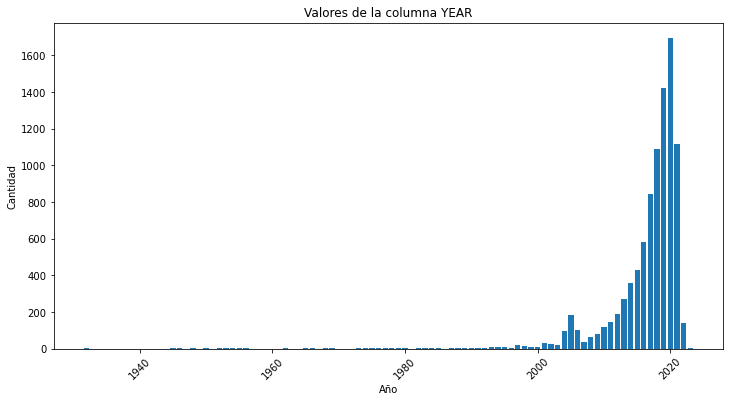

In [23]:
import matplotlib.pyplot as plt
# Contar los valores únicos de la columna 'YEAR'
year_counts = df['Año Inicio'].value_counts()

# Ordenar los valores por año ascendente
year_counts = year_counts.sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Valores de la columna YEAR')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Columna GENRE

In [24]:
 # Filtrar el DataFrame por el valor de la columna "MOVIE"
fila_especifica = df.loc[df['MOVIES'].str.contains('The Lincoln Lawyer')]
fila_especifica


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Completitud,YEAR2,Año Inicio,Año Fin,Edad
740,The Lincoln Lawyer,(2011),"\nCrime, Drama, Mystery",7.3,\nA lawyer defending a wealthy man begins to b...,\n Director:\nBrad Furman\n| \n Stars:\n...,"222,054",118.0,$58.01M,9,2011,2011.0,2011.0,0.0
1863,The Lincoln Lawyer,nan,"\nCrime, Drama, Mystery",NaN,\nAn iconoclastic idealist runs his law practi...,\n \n Stars:\nChristopher Gorham...,NaN,60.0,NaN,5,,NaN,NaN,NaN
9467,The Lincoln Lawyer,nan,"\nCrime, Drama, Mystery",NaN,\nAdd a Plot\n,"\n \n Stars:\nNeve Campbell, \nC...",NaN,NaN,NaN,4,,NaN,NaN,NaN
9468,The Lincoln Lawyer,nan,"\nCrime, Drama, Mystery",NaN,\nAdd a Plot\n,"\n \n Stars:\nMelvin Diggs, \nCh...",NaN,NaN,NaN,4,,NaN,NaN,NaN
9469,The Lincoln Lawyer,nan,"\nCrime, Drama, Mystery",NaN,\nAdd a Plot\n,\n \n Stars:\nChristopher Amitra...,NaN,NaN,NaN,4,,NaN,NaN,NaN
9470,The Lincoln Lawyer,nan,"\nCrime, Drama, Mystery",NaN,\nAdd a Plot\n,"\n \n Stars:\nGabriel Burrafato,...",NaN,NaN,NaN,4,,NaN,NaN,NaN
9471,The Lincoln Lawyer,nan,"\nCrime, Drama, Mystery",NaN,\nAdd a Plot\n,"\n \n Stars:\nJonathan Avigdori,...",NaN,NaN,NaN,4,,NaN,NaN,NaN
9472,The Lincoln Lawyer,nan,"\nCrime, Drama, Mystery",NaN,\nAdd a Plot\n,"\n \n Stars:\nCarlos Bernard, \n...",NaN,NaN,NaN,4,,NaN,NaN,NaN
9473,The Lincoln Lawyer,nan,"\nCrime, Drama, Mystery",NaN,\nAdd a Plot\n,"\n \n Stars:\nChris Browning, \n...",NaN,NaN,NaN,4,,NaN,NaN,NaN
9474,The Lincoln Lawyer,nan,"\nCrime, Drama, Mystery",NaN,\nAdd a Plot\n,\n \n Stars:\nChristopher Amitra...,NaN,NaN,NaN,4,,NaN,NaN,NaN


In [25]:
unique_values12 = fila_especifica['GENRE'].unique()
unique_values12

array(['\nCrime, Drama, Mystery            '], dtype=object)

In [26]:
unique_values = df['GENRE'].unique()
unique_values

array(['\nAction, Horror, Thriller            ',
       '\nAnimation, Action, Adventure            ',
       '\nDrama, Horror, Thriller            ',
       '\nAnimation, Adventure, Comedy            ',
       '\nAction, Crime, Horror            ',
       '\nAction, Crime, Drama            ',
       '\nDrama, Romance            ',
       '\nCrime, Drama, Mystery            ', '\nComedy            ',
       '\nAction, Adventure, Thriller            ',
       '\nCrime, Drama, Fantasy            ',
       '\nDrama, Horror, Mystery            ',
       '\nComedy, Drama, Romance            ',
       '\nCrime, Drama, Thriller            ', '\nDrama            ',
       '\nComedy, Drama            ',
       '\nDrama, Fantasy, Horror            ',
       '\nComedy, Romance            ',
       '\nAction, Adventure, Drama            ',
       '\nCrime, Drama            ',
       '\nDrama, History, Romance            ',
       '\nHorror, Mystery            ', '\nComedy, Crime            ',
     

In [27]:
# Limpiar la columna "Generes"

# Convertir la columna 'GENRE' a cadenas de texto
df['GENRE'] = df['GENRE'].astype(str)

df['GENRE'] = df['GENRE'].str.strip()  # Eliminar espacios en blanco al inicio y al final
df['GENRE'] = df['GENRE'].str.replace('\n', '')  # Eliminar saltos de línea

# Separar los géneros en una lista
df['GENRE'] = df['GENRE'].str.split(',')

# Eliminar espacios en blanco en cada género
df['GENRE'] = df['GENRE'].apply(lambda x: [genre.strip() for genre in x])

# Convertir la columna a tipo lista de strings
df['GENRE'] = df['GENRE'].apply(lambda x: ', '.join(x))

# Mostrar los resultados
print(df['GENRE'])

0           Action, Horror, Thriller
1       Animation, Action, Adventure
2            Drama, Horror, Thriller
3       Animation, Adventure, Comedy
4              Action, Crime, Horror
                    ...             
9994       Adventure, Drama, Fantasy
9995    Animation, Action, Adventure
9996              Documentary, Sport
9997       Adventure, Drama, Fantasy
9998       Adventure, Drama, Fantasy
Name: GENRE, Length: 9999, dtype: object


In [28]:
# Crear una lista para almacenar los géneros únicos
generos_unicos = []

# Recorrer cada fila y capturar los géneros únicos
for fila in df['GENRE']:
    generos = fila.strip("[]' ").split(", ")
    for genero in generos:
        if genero not in generos_unicos:
            generos_unicos.append(genero)

# Crear columnas separadas para cada género y establecer valores
for genero in generos_unicos:
    df[genero] = df['GENRE'].apply(lambda x: 'X' if genero in x else '')

# Agregar columna "Cantidad de Géneros"
df['Cantidad de Géneros'] = df['GENRE'].apply(lambda x: len(x.strip("[]' ").split(", ")))
# Mostrar los resultados
print(df.shape)
df.head(15)

(9999, 43)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Completitud,...,Game-Show,Reality-TV,Musical,War,Western,Film-Noir,nan,Talk-Show,News,Cantidad de Géneros
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,8,...,,,,,,,,,,3
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,8,...,,,,,,,,,,3
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,8,...,,,,,,,,,,3
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,8,...,,,,,,,,,,3
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,5,...,,,,,,,,,,3
5,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,8,...,,,,,,,,,,3
6,The Last Letter from Your Lover,(2021),"Drama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN,8,...,,,,,,,,,,2
7,Dexter,(2006–2013),"Crime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN,8,...,,,,,,,,,,3
8,Never Have I Ever,(2020– ),Comedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN,8,...,,,,,,,,,,1
9,Virgin River,(2019– ),"Drama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN,8,...,,,,,,,,,,2


In [29]:
generos_unicos

['Action',
 'Horror',
 'Thriller',
 'Animation',
 'Adventure',
 'Drama',
 'Comedy',
 'Crime',
 'Romance',
 'Mystery',
 'Fantasy',
 'History',
 'Sci-Fi',
 'Biography',
 'Family',
 'Documentary',
 'Music',
 'Sport',
 'Short',
 'Game-Show',
 'Reality-TV',
 'Musical',
 'War',
 'Western',
 'Film-Noir',
 'nan',
 'Talk-Show',
 'News']

# Columna STARS

In [30]:
df['STARS']

0       \n    Director:\nPeter Thorwarth\n| \n    Star...
1       \n            \n    Stars:\nChris Wood, \nSara...
2       \n            \n    Stars:\nAndrew Lincoln, \n...
3       \n            \n    Stars:\nJustin Roiland, \n...
4       \n    Director:\nMatthias Schweighöfer\n| \n  ...
                              ...                        
9994    \n            \n    Stars:\nMorgan Taylor Camp...
9995                                                   \n
9996    \n    Director:\nOrlando von Einsiedel\n| \n  ...
9997    \n    Director:\nJovanka Vuckovic\n| \n    Sta...
9998    \n    Director:\nJovanka Vuckovic\n| \n    Sta...
Name: STARS, Length: 9999, dtype: object

In [31]:
# Limpieza de la columna "STAR"
df['STARS'] = df['STARS'].str.replace('\n', '')

# Crear columnas Director y Estrellas
df['Director'] = ""
df['Estrellas'] = ""

# Recorrer las filas y dividir la columna STARS si contiene el carácter "|"
for index, row in df.iterrows():
    stars = row['STARS']
    if '|' in stars:
        director, estrellas = stars.split('|', 1)
        df.at[index, 'Director'] = director.strip().replace('Director:', '').replace('Directors:', '')
        df.at[index, 'Estrellas'] = estrellas.strip().replace('Stars:', '').replace('Star:', '')
    else:
        df.at[index, 'Estrellas'] = stars.strip().replace('Stars:', '').replace('Star:', '')

# Mostrar los resultados
df[['STARS', 'Director', 'Estrellas']]

,STARS,Director,Estrellas
0,Director:Peter Thorwarth| Stars:Peri B...,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,"Stars:Chris Wood, Sarah Michel...",,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,"Stars:Andrew Lincoln, Norman R...",,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,"Stars:Justin Roiland, Chris Pa...",,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Director:Matthias Schweighöfer| Stars:...,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...
9994,"Stars:Morgan Taylor Campbell, ...",,"Morgan Taylor Campbell, Chris Cope, Iñaki Godo..."
9995,,,
9996,Director:Orlando von Einsiedel| Star:P...,Orlando von Einsiedel,Prince Harry
9997,Director:Jovanka Vuckovic| Stars:Morga...,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J..."


In [32]:
# Columna ONLINE

In [33]:
# Eliminar saltos de columna en la columna "ONLINE"
df['ONE-LINE'] = df['ONE-LINE'].str.replace('\n', '')

# Mostrar los resultados
print(df.shape)
df.head(5)

(9999, 45)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Completitud,...,Musical,War,Western,Film-Noir,nan,Talk-Show,News,Cantidad de Géneros,Director,Estrellas
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN,8,...,,,,,,,,3,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN,8,...,,,,,,,,3,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN,8,...,,,,,,,,3,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN,8,...,,,,,,,,3,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN,5,...,,,,,,,,3,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [34]:
# Presentar estadísticas del DataFrame
estadisticas = df.describe()

# Contar valores únicos en las columnas categóricas
conteo_generos = df['GENRE'].value_counts()
conteo_directores = df['Director'].value_counts()
conteo_estrellas = df['Estrellas'].value_counts()

# Mostrar los resultados
print("Estadísticas del DataFrame:")
estadisticas
print()

print("Conteo de géneros:")
print(conteo_generos)
print()

print("Conteo de directores:")
print(conteo_directores)
print()

print("Conteo de estrellas:")
print(conteo_estrellas)

Estadísticas del DataFrame:

Conteo de géneros:
Comedy                          852
Animation, Action, Adventure    693
Drama                           562
Documentary                     498
Crime, Drama, Mystery           336
                               ... 
Action, Drama, Western            1
Comedy, Horror, Talk-Show         1
Family, Music, Romance            1
Animation, Adventure, Horror      1
Documentary, Crime, Thriller      1
Name: GENRE, Length: 511, dtype: int64

Conteo de directores:
                                 3983
Adam Heydt                         28
Brian Smith                        21
Oliver Driver                      21
Giancarlo Volpe                    19
                                 ... 
James Franco, Travis Mathews        1
Felix Herngren, Måns Herngren       1
Sandi Tan                           1
Ali Atay                            1
Åke Sandgren                        1
Name: Director, Length: 3583, dtype: int64

Conteo de estrellas:
           

In [35]:
# # Definir la función de agregación para unir los datos
# def unir_datos(datos):
#     if isinstance(datos, np.ndarray):
#         return ', '.join(np.unique(datos))
#     return ', '.join(datos.apply(str).unique())

# # Aplicar la función de agregación en las columnas deseadas
# columnas_deseadas = ['YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS']
# df_unido = df.groupby('MOVIES')[columnas_deseadas].apply(unir_datos).reset_index()

# # Mostrar el DataFrame unido
# print("DataFrame unido:")
# print(df_unido)

# LIMPIEZA DE DATOS COMPLETA
Despues de realizar la exploración de los datos y con cada uno de los apartes anteriormente definidos se procede a realizar la limpieza cumpliendo las reglas 

In [36]:
# Leer el archivo CSV
df2 = pd.read_csv('Assessment_archivo_fuente.csv', encoding='utf-8')

# Función para limpiar los valores de la columna 'YEAR'
import datetime

## Limpiar la columna "Generes"

# Convertir la columna 'GENRE' a cadenas de texto
df2['GENRE'] = df2['GENRE'].astype(str)

df2['GENRE'] = df2['GENRE'].str.strip()  # Eliminar espacios en blanco al inicio y al final
df2['GENRE'] = df2['GENRE'].str.replace('\n', '')  # Eliminar saltos de línea

# Separar los géneros en una lista
df2['GENRE'] = df2['GENRE'].str.split(',')

# Eliminar espacios en blanco en cada género
df2['GENRE'] = df2['GENRE'].apply(lambda x: [genre.strip() for genre in x])

# Convertir la columna a tipo lista de strings
df2['GENRE'] = df2['GENRE'].apply(lambda x: ', '.join(x))


# # Crear columnas separadas para cada género y establecer valores
# for genero in generos_unicos:
#     df2[genero] = df2['GENRE'].apply(lambda x: 'X' if genero in x else '')

# Agregar columna "Cantidad de Géneros"
df2['Cantidad de Géneros'] = df2['GENRE'].apply(lambda x: len(x.strip("[]' ").split(", ")))


##Limpiar Columa YEAR
# Convertir la columna 'YEAR' a cadenas de texto
df2['YEAR'] = df2['YEAR'].astype(str)

current_year = datetime.datetime.now().year

# Función para limpiar los valores de la columna 'YEAR'
def quitar_no_numeros(cadena):
    nueva_cadena = ''
    for caracter in cadena:
        if caracter.isdigit() or caracter == '–':
            nueva_cadena += caracter
    return nueva_cadena

# Función para obtener el año final
def obtener_anio_fin(year2):
    if re.fullmatch(r'\d{4}', year2):
        return year2
    elif re.fullmatch(r'\d{4}–', year2):
        return str(datetime.datetime.now().year)
    elif re.fullmatch(r'\d{4}–\d{4}', year2):
        anios = re.findall(r'\d{4}', year2)
        return anios[1]
    else:
        return None

# Aplicar la limpieza a la columna 'YEAR' y crear la columna 'YEAR2'
df2['YEAR2'] = df2['YEAR'].apply(quitar_no_numeros)

# Crear las columnas 'Año Inicio', 'Año Fin' y 'Edad'
df2['Año Inicio'] = df2['YEAR2'].apply(lambda x: x.split('–')[0] if '–' in x else x)
df2['Año Fin'] = df2['YEAR2'].apply(obtener_anio_fin)
df2['Año Inicio'] = pd.to_numeric(df2['Año Inicio'], errors='coerce')
df2['Año Fin'] = pd.to_numeric(df2['Año Fin'], errors='coerce')
df2['Edad'] = df2['Año Fin'] - df2['Año Inicio']


# Eliminar saltos de columna en la columna "ONLINE"
df2['ONE-LINE'] = df2['ONE-LINE'].str.replace('\n', '')

# Limpieza de la columna "STAR"
df2['STARS'] = df2['STARS'].str.replace('\n', '')

# Crear columnas Director y Estrellas
df2['Director'] = ""
df2['Estrellas'] = ""

# Recorrer las filas y dividir la columna STARS si contiene el carácter "|"
for index, row in df2.iterrows():
    stars = row['STARS']
    if '|' in stars:
        director, estrellas = stars.split('|', 1)
        df2.at[index, 'Director'] = director.strip().replace('Director:', '').replace('Directors:', '')
        df2.at[index, 'Estrellas'] = estrellas.strip().replace('Stars:', '').replace('Star:', '')
    else:
        df2.at[index, 'Estrellas'] = stars.strip().replace('Stars:', '').replace('Star:', '')



# Definir la función de limpieza de texto
def limpiar_texto(texto):
    # Eliminar espacios en blanco
    texto = texto.strip()
    
    # Quitar tildes y caracteres especiales
    texto = unidecode(texto)
    
    # Eliminar caracteres de pregunta, exclamación y numeral
    texto = re.sub(r'[^a-zA-Z0-9 ]+', '', texto)
    
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Eliminar espacios en blanco nuevamente
    texto = re.sub(r'\s+', '', texto)
    
    return texto

# Aplicar la función a la columna "MOVIES" y crear una nueva columna llamada "Movies2"
df2['Movies2'] = df2['MOVIES'].apply(limpiar_texto)

# Definir la función para concatenar los valores de la columna "STARS"
def concatenar_stars(stars):
    non_nan_stars = [str(star) for star in stars if not pd.isnull(star)]
    return ', '.join(non_nan_stars)

# Función para convertir el valor de Gross a numérico
def convertir_gross(valor):
    if isinstance(valor, str):
        # Eliminar caracteres no numéricos
        valor_limpio = re.sub(r'[^\d.]', '', valor)
        # Convertir a float
        return float(valor_limpio)
    return valor

# Aplicar la función convertir_gross a la columna Gross
df2['Gross'] = df2['Gross'].apply(convertir_gross)

# Convertir la columna 'Gross' a numérico y reemplazar NaN por 0
df2['Gross'] = pd.to_numeric(df2['Gross'], errors='coerce').fillna(0)
# Convertir la columna 'VOTES' a tipo numérico y reemplazar los valores no numéricos por NaN
df2['VOTES'] = pd.to_numeric(df2['VOTES'], errors='coerce')


# Aplicar las funciones de agregación en las columnas deseadas
agregaciones = {
    'MOVIES': ('MOVIES', 'first'),
    'YEAR': ('YEAR', 'first'),
    'GENRE': ('GENRE', 'first'),
    'RATING': ('RATING', 'mean'),
    'ONE-LINE': ('ONE-LINE', concatenar_stars),
    'STARS': ('STARS', concatenar_stars),
    'VOTES': ('VOTES', 'max'),
    'RunTime': ('RunTime', 'mean'),
    'Gross': ('Gross', 'max')
}


# Aplicar las funciones de agregación en las columnas deseadas
df2_agregado = df2.groupby('Movies2').agg(**agregaciones).reset_index()

# Obtener las columnas que faltan en df2_agregado
columnas_faltantes = set(df2.columns) - set(df2_agregado.columns)

# Agregar las columnas faltantes a las agregaciones
for columna in columnas_faltantes:
    if df2[columna].dtype == 'object':
        agregaciones[columna] = (columna, 'first')
    else:
        agregaciones[columna] = (columna, 'max')

# Aplicar las funciones de agregación en las columnas deseadas
df2_agregado = df2.groupby('Movies2').agg(**agregaciones).reset_index()

# Renombrar columnas
nombres_columnas = {
    'MOVIES': 'MOVIES',
    'YEAR': 'YEAR',
    'GENRE': 'GENRE',
    'RATING': 'RATING',
    'ONE-LINE': 'ONE-LINE',
    'STARS': 'STARS',
    'VOTES': 'VOTES',
    'RunTime': 'RunTime',
    'Gross': 'Gross',
}

df2_agregado = df2_agregado.rename(columns=nombres_columnas)

# Mostrar el DataFrame agregado y renombrado
print(df2_agregado)

                                     Movies2  \
0                      1000000yennoonnatachi   
1                                10000timmar   
2                                    100coco   
3                     100diasparaenamorarnos   
4                                  100hotter   
...                                      ...   
6413                                 zuiquan   
6414                      zumbosjustdesserts   
6415  zumzumzumlacanzonechemipassaperlatesta   
6416                           zwaarverliefd   
6417                               zwartboek   

                                                 MOVIES         YEAR  \
0                            1,000,000 yen no Onnatachi       (2017)   
1                                         10 000 timmar       (2014)   
2                                             100% Coco       (2017)   
3                             100 días para enamorarnos     (2020– )   
4                                           100% Hotter     (20

In [37]:
 # Filtrar el DataFrame por el valor de la columna "MOVIE"
fila_especifica23 = df2_agregado.loc[df2_agregado['MOVIES'].str.contains('The Lincoln Lawyer')]
fila_especifica23


,Movies2,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Edad,Director,Cantidad de Géneros,Estrellas,Año Fin,Año Inicio,YEAR2
5375,thelincolnlawyer,The Lincoln Lawyer,(2011),"Crime, Drama, Mystery",7.3,A lawyer defending a wealthy man begins to bel...,Director:Brad Furman| Stars:Matthew Mc...,NaN,89.0,58.01,0.0,Brad Furman,3,"Matthew McConaughey, Marisa Tomei, Ryan Philli...",2011.0,2011.0,2011


In [38]:
# Obtener las columnas que no estaban en el DataFrame inicial
columnas_excluidas = set(df2_agregado.columns) - set(df.columns)

# Crear un nuevo DataFrame excluyendo las columnas no deseadas
df_nuevo = df2_agregado.drop(columns=columnas_excluidas)

In [39]:
rows = len(df2_agregado.axes[0]) 
cols = len(df2_agregado.axes[1])   

print('\033[1m' +"Las dimensiones de los datos limpios son:"+'\033[0m')
print("Number of Rows: " + str(rows)) 
print("Number of Columns: " + str(cols)) 
print(" ")
print('\033[1m' +"Las columnas y tipos de los datos:"+'\033[0m')
print(df2_agregado.dtypes)
# Identificar la cantidad de datos faltantes en cada columna
datos_faltantes = df_nuevo.isna().sum()

# Calcular el porcentaje de datos faltantes en cada columna
total_datos = df_nuevo.shape[0]
porcentaje_faltantes = (datos_faltantes / total_datos) * 100

# Crear un nuevo DataFrame con los resultados
resultados3 = pd.DataFrame({'Datos faltantes': datos_faltantes, '% Faltante': porcentaje_faltantes})

# Mostrar los resultados
print(" ")
print('\033[1m' +"Datos faltantes por columna:"+'\033[0m')
print(resultados3)

Las dimensiones de los datos limpios son:
Number of Rows: 6418
Number of Columns: 17
 
Las columnas y tipos de los datos:
Movies2                 object
MOVIES                  object
YEAR                    object
GENRE                   object
RATING                 float64
ONE-LINE                object
STARS                   object
VOTES                  float64
RunTime                float64
Gross                  float64
Edad                   float64
Director                object
Cantidad de Géneros      int64
Estrellas               object
Año Fin                float64
Año Inicio             float64
YEAR2                   object
dtype: object
 
Datos faltantes por columna:
                     Datos faltantes  % Faltante
MOVIES                             0    0.000000
YEAR                               0    0.000000
GENRE                              0    0.000000
RATING                           903   14.069804
ONE-LINE                           0    0.000000
STARS       

In [40]:
df2_agregado['Año Inicio']


0       2017.0
1       2014.0
2       2017.0
3       2020.0
4       2016.0
         ...  
6413    1978.0
6414    2016.0
6415    1969.0
6416    2018.0
6417    2006.0
Name: Año Inicio, Length: 6418, dtype: float64

In [41]:
import pandas as pd

# Estadísticas
num_peliculas = df.shape[0]
num_limpio = df2_agregado.shape[0]
num_generos_unicos = len(generos_unicos)
rating_promedio = df2_agregado['RATING'].mean()
duracion_promedio = df2_agregado['RunTime'].mean()
ingresos_totales = df2_agregado['Gross'].sum()

# Presentación de estadísticas
print("Estadísticas del Proceso de Limpieza")
print("------------------------------------")
print(f"Número de datos inicial: {num_peliculas}")
print(f"Número de datos final: {num_limpio}")
print(f"Géneros únicos: {num_generos_unicos}")
print(f"Rating promedio: {rating_promedio:.2f}")
print(f"Duración promedio: {duracion_promedio:.0f} minutos")
print(f"Ingresos totales: ${ingresos_totales:,}")


Estadísticas del Proceso de Limpieza
------------------------------------
Número de datos inicial: 9999
Número de datos final: 6418
Géneros únicos: 28
Rating promedio: 6.61
Duración promedio: 79 minutos
Ingresos totales: $19,883.89


In [42]:
# Identificar la cantidad de datos faltantes en cada columna
datos_faltantes = df2_agregado.isna().sum()

# Calcular el porcentaje de datos faltantes en cada columna
total_datos = df2_agregado.shape[0]
porcentaje_faltantes = (datos_faltantes / total_datos) * 100

# Crear un nuevo DataFrame con los resultados
resultados2 = pd.DataFrame({'Datos faltantes': datos_faltantes, '% Faltante': porcentaje_faltantes})

# Mostrar los resultados
print(" ")
print('\033[1m' +"Datos faltantes por columna:"+'\033[0m')
print('\033[1m' +"Assessment_archivo_fuente :"+'\033[0m')
print(resultados)
print('\033[1m' +"Assessment_limpio :"+'\033[0m')
print(resultados2)


 
Datos faltantes por columna:
Assessment_archivo_fuente :
          Datos faltantes  % Faltante
MOVIES                  0    0.000000
YEAR                  644    6.440644
GENRE                  80    0.800080
RATING               1820   18.201820
ONE-LINE                0    0.000000
STARS                   0    0.000000
VOTES                1820   18.201820
RunTime              2958   29.582958
Gross                9539   95.399540
Assessment_limpio :
                     Datos faltantes  % Faltante
Movies2                            0    0.000000
MOVIES                             0    0.000000
YEAR                               0    0.000000
GENRE                              0    0.000000
RATING                           903   14.069804
ONE-LINE                           0    0.000000
STARS                              0    0.000000
VOTES                           3943   61.436585
RunTime                         1298   20.224369
Gross                              0    0.000000
Ed

In [43]:
resultados3

,Datos faltantes,% Faltante
MOVIES,0,0.000000
YEAR,0,0.000000
GENRE,0,0.000000
RATING,903,14.069804
ONE-LINE,0,0.000000
STARS,0,0.000000
VOTES,3943,61.436585
RunTime,1298,20.224369
Gross,0,0.000000
Edad,507,7.899657


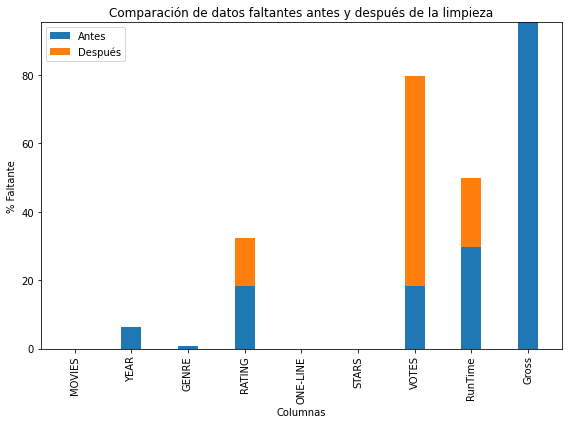

In [44]:
import matplotlib.pyplot as plt

# Etiquetas de las filas a eliminar
filas_eliminar = ['Año Fin', 'YEAR2', 'Cantidad de Géneros',"Estrellas","Edad","Año Inicio","Director"]

# Eliminar las filas del DataFrame
#resultados = resultados.drop(filas_eliminar)

# Obtener los datos de porcentaje de datos faltantes antes y después de la limpieza
porcentaje_antes = resultados['% Faltante']
resultados3 = resultados3.drop(filas_eliminar)
porcentaje_despues = resultados3['% Faltante']

# Crear una lista con los nombres de las columnas
columnas = resultados.index

# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
x = range(len(columnas))
width = 0.35

# Crear las barras para los porcentajes antes y después de la limpieza
rects1 = ax.bar(x, porcentaje_antes, width, label='Antes')
rects2 = ax.bar(x, porcentaje_despues, width, label='Después', bottom=porcentaje_antes)

# Configurar los ejes y el título del gráfico
ax.set_xlabel('Columnas')
ax.set_ylabel('% Faltante')
ax.set_title('Comparación de datos faltantes antes y después de la limpieza')
ax.set_xticks(x)
ax.set_xticklabels(columnas, rotation=90)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

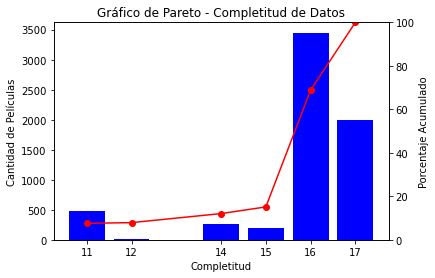

In [45]:
# Obtener la cantidad de datos no nulos en cada fila
completitud = df2_agregado.count(axis=1)

# Agregar la columna "Completitud" al DataFrame
df2_agregado['Completitud'] = completitud


# Obtener la cantidad de películas con cada nivel de completitud
completitud_counts = df2_agregado['Completitud'].value_counts().sort_index()

# Calcular el porcentaje acumulado
porcentaje_acumulado = (completitud_counts.cumsum() / completitud_counts.sum()) * 100

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots()

ax1.bar(completitud_counts.index, completitud_counts, color='b')
ax1.set_xlabel('Completitud')
ax1.set_ylabel('Cantidad de Películas')
ax1.set_xticks(completitud_counts.index)

ax2 = ax1.twinx()
ax2.plot(completitud_counts.index, porcentaje_acumulado, 'r-', marker='o')
ax2.set_ylim([0, 100])
ax2.set_ylabel('Porcentaje Acumulado')

plt.title('Gráfico de Pareto - Completitud de Datos')

plt.show()

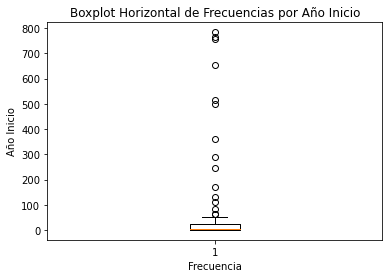

In [46]:
import matplotlib.pyplot as plt

# Contar los valores únicos de la columna 'Año Inicio'
year_counts = df2_agregado['Año Inicio'].value_counts()

# Crear el gráfico de boxplot horizontal
plt.boxplot(year_counts, vert=True)

# Personalizar el gráfico
plt.xlabel('Frecuencia')
plt.ylabel('Año Inicio')
plt.title('Boxplot Horizontal de Frecuencias por Año Inicio')

# Mostrar el gráfico
plt.show()

In [47]:
# Convertir la columna 'Año Inicio' a entero
df2_agregado['Año Inicio'] = df2_agregado['Año Inicio'].fillna(0).astype(int)

# Convertir la columna 'Año Fin' a entero y manejar los valores no finitos
df2_agregado['Año Fin'] = df2_agregado['Año Fin'].fillna(0)
df2_agregado['Año Fin'] = df2_agregado['Año Fin'].replace([np.inf, -np.inf], 0).astype(int)

# Calcular la columna 'Edad'
df2_agregado['Edad'] = df2_agregado['Año Fin'] - df2_agregado['Año Inicio']

In [48]:
# Especificar la ruta y nombre del archivo de salida
ruta_archivo = 'dataset_limpio.csv'

# Exportar el DataFrame a un archivo CSV
df2_agregado.to_csv(ruta_archivo, sep='|', index=False)